In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris['target'])

X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(int)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X,y)

LogisticRegression()

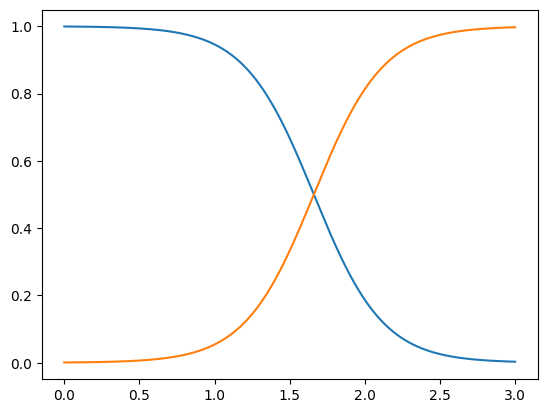

In [4]:
x_new = np.linspace(0,3,1000).reshape(-1,1) # -1自动推断该维度的大小
x_new_pred = log_res.predict_proba(x_new)  # 得到概率
plt.plot(x_new,x_new_pred)
plt.show()

In [5]:
X = iris['data'][:,(2,3)]
y = (iris['target'] == 2).astype(int)

from sklearn.linear_model import LogisticRegression
log_res = LogisticRegression()
log_res.fit(X,y)

LogisticRegression()

In [6]:
# 构建坐标数据
X[:,0].min() , X[:,0].max()

(np.float64(1.0), np.float64(6.9))

In [7]:
X[:,1].min() , X[:,1].max()

(np.float64(0.1), np.float64(2.5))

In [8]:
# 一维坐标轴数据转换为二维网格  X, Y = np.meshgrid(x, y)
# X 是一个二维数组，其中的每一行都包含了 x 数组的相同元素（列方向上的重复）。
# Y 是另一个二维数组，其中的每一列都包含了 y 数组的相同元素（行方向上的重复）
x0,x1 = np.meshgrid(np.linspace(1,3,3),np.linspace(10,30,3))
print(x0)
print(x1)
# 生成二维网络,覆盖某个二维区域
x3 = np.c_[x0.ravel(),x1.ravel()]
print(x3)

[[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]
[[10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
[[ 1. 10.]
 [ 2. 10.]
 [ 3. 10.]
 [ 1. 20.]
 [ 2. 20.]
 [ 3. 20.]
 [ 1. 30.]
 [ 2. 30.]
 [ 3. 30.]]


In [9]:
x0,x1 = np.meshgrid(np.linspace(0,7,500).reshape(-1,1),np.linspace(0,2.7,200).reshape(-1,1))

In [10]:
# ravel() 将多维数组展平为一维数组。
# 它与 flatten() 的区别在于，ravel() 返回的是原始数据的视图（如果可能），而 flatten() 总是返回副本。
# 副本（copy）：创建一个全新的数组，独立于原数组，修改副本不会影响原数组。
# 视图（view）：对原数组数据的引用，修改视图会直接影响原数组，视图和原数组共享内存。
x_new = np.c_[x0.ravel(),x1.ravel()]


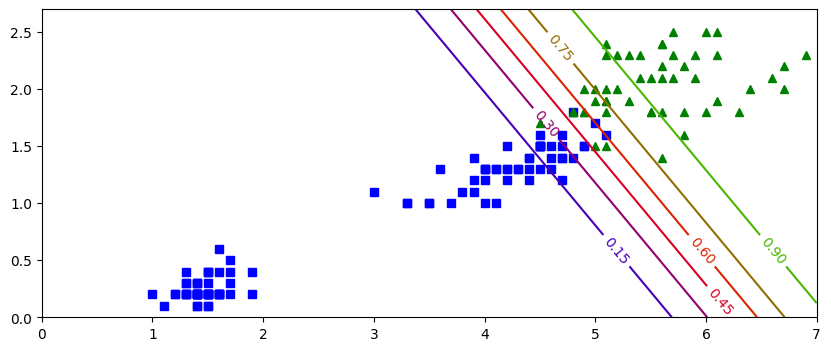

In [11]:
# 绘制概率等高线图
x_new_predictions = log_res.predict_proba(x_new)
plt.figure(figsize=(10,4))
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')
z = x_new_predictions[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,z,cmap = plt.cm.brg)
plt.clabel(contour)
plt.show()

##### softmax函数
假设输入为一个向量 $  z = (z_1, z_2, \dots, z_n) $，其中 $ z_i $是第 $i $ 类的得分（logits）。Softmax函数将这些得分转换为概率，公式如下：
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

假设我们有一个多分类问题，类别数为 $ K $，输入样本为 $ \mathbf{x} = (x_1, x_2, \dots, x_n) $，模型的输出通过Softmax函数给出。对于每一个类别 $ k $，Softmax回归模型的输出概率 $ P(y=k \mid \mathbf{x}) $ 为：

$$
P(y=k \mid \mathbf{x}) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$
其中，$ z_k = \mathbf{w}_k^\top \mathbf{x} + b_k $ 是类别 $ k $ 的得分（logit），$ \mathbf{w}_k $ 是类别 $ k $ 的权重向量，$ b_k $ 是偏置项。


对于一个训练样本 $ (\mathbf{x}_i, y_i) $，其中 $ y_i $ 是真实标签，Softmax逻辑回归的损失函数（交叉熵损失）为：

$$
L(\mathbf{x}_i, y_i) = - \log P(y_i \mid \mathbf{x}_i)
$$

对于整个训练集 $ \{(\mathbf{x}_1, y_1), (\mathbf{x}_2, y_2), \dots, (\mathbf{x}_m, y_m)\} $，总损失是所有样本损失的平均值：

$$
L(\mathbf{X}, \mathbf{y}) = - \frac{1}{m} \sum_{i=1}^{m} \log P(y_i \mid \mathbf{x}_i)
$$

其中，$ P(y_i \mid \mathbf{x}_i) $ 是通过Softmax函数计算的样本 $ \mathbf{x}_i $ 属于类别 $ y_i $ 的概率。


将Softmax的公式代入损失函数中，得到：

$$
L(\mathbf{X}, \mathbf{y}) = - \frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} \mathbb{1}(y_i = k) \log \left( \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}} \right)
$$

其中，$ \mathbb{1}(y_i = k) $ 是指示函数，当 $ y_i = k $ 时，值为1，否则为0。






In [12]:
X = iris['data'][:,(2,3)]
y = iris['target']
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
softmax_reg.fit(X,y)

d:\Anaconda\envs\python39\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

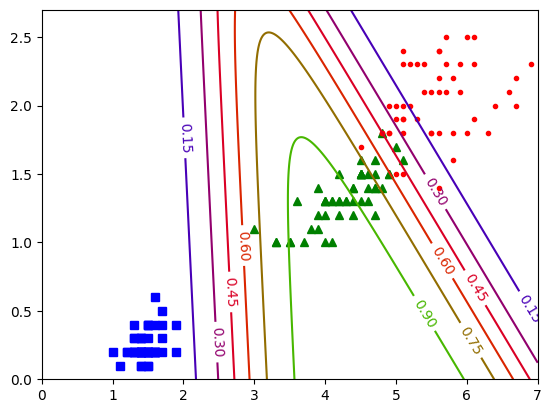

In [16]:
x0,x1 = np.meshgrid(np.linspace(0,7,500).reshape(-1,1),np.linspace(0,2.7,200).reshape(-1,1))
x_new = np.c_[x0.ravel(),x1.ravel()]
y_pred = softmax_reg.predict(x_new)
# 绘制概率等高线图
x_new_predictions = softmax_reg.predict_proba(x_new)
plt.plot(X[y==0,0],X[y==0,1],'bs')
plt.plot(X[y==1,0],X[y==1,1],'g^')
plt.plot(X[y==2,0],X[y==2,1],'r.')
z = x_new_predictions[:,1].reshape(x0.shape)
contour = plt.contour(x0,x1,z,cmap = plt.cm.brg)
plt.clabel(contour)
plt.show()